In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정 - 윈도우 
plt.rcParams['font.family'] = 'Malgun Gothic'

# 글자 크기
plt.rcParams['font.size'] = 15

# 폰트 설정 시 - 기호 깨는 거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 크기
plt.rcParams['figure.figsize'] = 15,7

# 1.데이터 읽어오기

한국 복지 패널은 빈공층, 근로빈곤층, 차상위층 등 다양한 계층의 규모 및 생활 실태 변화를 추적하여 파악함으로써 정책 형성에 기여를 하고 있다.

In [ ]:
df1 = pd.read_excel('data/dataset2017.xlsx')
df1

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


- h12_g3 : 성별 - 남자(1), 여자(2), 모름/무응답(9)
- h12_g4 : 태어난 년도. 1900 - 2014, 모름/무응답(9999)
- h12_g10 : 혼인상태. 유배우(1), 사별(2), 이혼(3), 별거(4), 미혼(5, 18세 이상, 미혼모 포함, 기타(6, 사망 등), 해당없음(0, 18세미만), 모름/무응답(9)
- h12_g11 : 종교. 있음(1), 없음(2), 모름/무응답(9)
- h12_eco9 : 직종. 직종코드표를 참고. 모름/무응답(9999)
- p1202_8aq1 : 일을 한 달의 월 평균 임금
- h12_reg7 : 7개 권역별 지역 구분. 서울(1), 수도권(2, 인천/경기), 부산/울산/경남(3), 대구/경북(4), 대전/충남(5). 강원/충북(6), 광주/전남/전북/제주도(7)

In [ ]:
df1.info()
# 너무 많아서 안나옴 ^^;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


# 2.조사 대상에 대한 성별 분포

In [ ]:
# 성별 컬럼만 추출
df2 = df1[['h12_g3']]
df2.columns = ['성별']
df2

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [ ]:
# 결측치 확인
df2['성별'].isna().sum()

0

In [ ]:
# 이상치 확인 
df2['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [ ]:
# 성별 값을 남자, 여자로 바꾼다.
a1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별'] = df2['성별'].map(a1)
df2

<ipython-input-20-e5e2293a5c04>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].map(a1)


,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


In [ ]:
# 각 성별의 수를 구한다.
df3 = pd.DataFrame(df2['성별'].value_counts())
df3.columns = ['명']
df3

,명
여자,8440
남자,6982


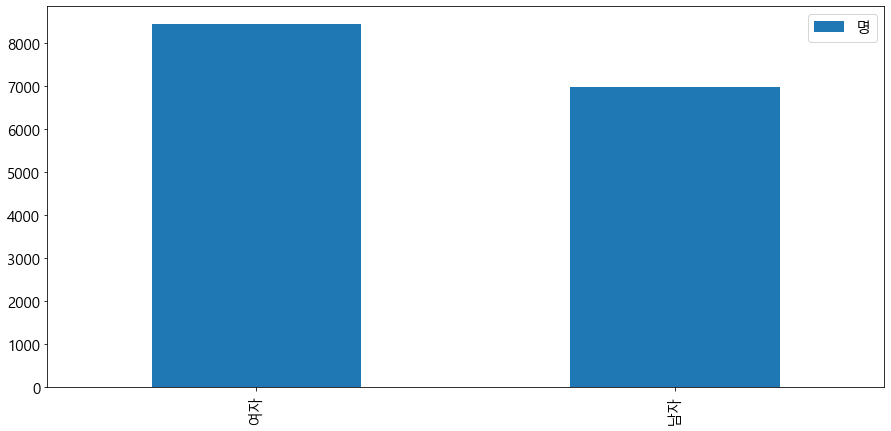

In [ ]:
# 시각화
df3.plot.bar()
plt.show()

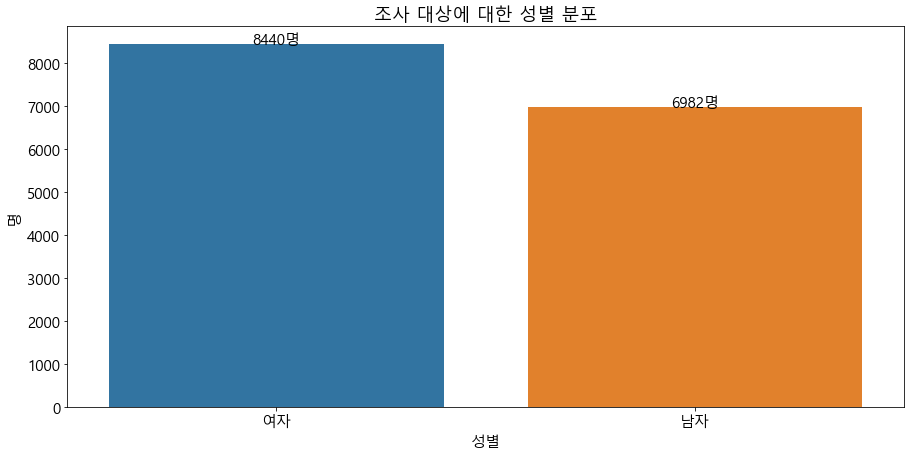

In [ ]:
# count plot 사용하기
sns.countplot(x='성별',data=df2)

plt.title('조사 대상에 대한 성별 분포')
plt.ylabel('명')

# 저장되어 있는 값의 수를 파악한다.
a100 = df2['성별'].value_counts()

for idx, value in enumerate(a100):
    # 표시할 문자열
    txt = f'{value}명'
    
    plt.text(idx,value,txt, color='black',
            horizontalalignment = 'center')

plt.show()

# 3.성별에 따른 평균 월급 차이 분석

In [ ]:
# 데이터 추출
df2 = df1[['h12_g3','p1202_8aq1']]
df2.columns = ['성별', '월급']
df2

,성별,월급
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [ ]:
# 성별데이터 변경
a1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별']= df2['성별'].map(a1)
df2

<ipython-input-96-a94addd2cb9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별']= df2['성별'].map(a1)


,성별,월급
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


In [ ]:
# 결측치 확인
df2.isna().sum()

성별        0
월급    10915
dtype: int64

In [ ]:
# 이상치 확인 
df2['월급'].agg(['min','max'])

min       0.0
max    1874.0
Name: 월급, dtype: float64

In [ ]:
# 결측치인 로우를 모두 제거한다.
df2.dropna(inplace=True)
df2.isna().sum()

<ipython-input-99-16d3d29c22d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


성별    0
월급    0
dtype: int64

In [ ]:
# 성별에 따른 월급 평균을 구한다
# 성별과 급여 평균 형태로 되어있는 데이터 프레임을 생성한다.
a1 = df2.groupby('성별').mean()
display(a1)

# 인덱스를 데이터에 포함시킨다
a1.reset_index(inplace=True)
a1

,월급
성별,
남자,333.280785
여자,175.293108


,성별,월급
0,남자,333.280785
1,여자,175.293108


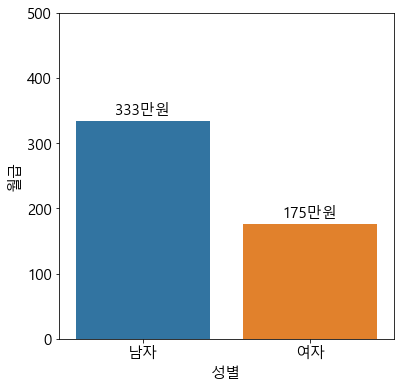

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='성별',y='월급',data=a1)


for idx, value in enumerate(a1['월급']):
    # 표시할 문자열
    txt = (f'{int(value)}만원')
    
    plt.text(idx,value+10,txt, color='black',
            horizontalalignment = 'center')

plt.ylim(0,500)

plt.show()

# 4.나이에 따른 평균 월급의 변화

In [ ]:
df2 = df1[['h12_g4','p1202_8aq1']]
df2

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [ ]:
# 컬럼 이름을 변경한다.
df2.columns = ['태어난년도','월급']
df2

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [ ]:
# 나이를 구해 추가해준다.
df2['나이'] = 2017 - df2['태어난년도'] + 1
df2

<ipython-input-133-3f327ffe09f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['나이'] = 2017 - df2['태어난년도'] + 1


,태어난년도,월급,나이
0,1936,NaN,82
1,1945,NaN,73
2,1948,NaN,70
3,1942,108.9,76
4,1923,NaN,95
...,...,...,...
15417,1967,NaN,51
15418,1992,NaN,26
15419,1995,72.0,23
15420,1998,NaN,20


In [ ]:
df2.agg(['min','max'])


,태어난년도,월급,나이
min,1907,0.0,2
max,2016,1874.0,111


In [ ]:
# 결측치 제거
# 월급이 결측치인 곳은 평균으로 채워준다.
m1 = df2['월급'].mean()
print(f'월급 평균 : {int(m1)}')


월급 평균 : 257


In [ ]:
# 월급 평균이 257이기 때문에 선생님 마음대로 정함
# 10살 미만 : 0
# 10실 ~ 19살 : 30만원
# 20살 ~ 29살 : 200만원
# 30살 ~ 39살 : 300만원
# 40살 ~ 49살 : 400만원
# 50살 이상 : 300만원

idx1 = df2[(df2['월급'].isna()) & (df2['나이'] < 10)].index
idx2 = df2[(df2['월급'].isna()) & ((df2['나이'] >= 10) & (df2['나이'] < 20))].index
idx3 = df2[(df2['월급'].isna()) & ((df2['나이'] >= 20) & (df2['나이'] < 30))].index
idx4 = df2[(df2['월급'].isna()) & ((df2['나이'] >= 30) & (df2['나이'] < 40))].index
idx5 = df2[(df2['월급'].isna()) & ((df2['나이'] >= 40) & (df2['나이'] < 50))].index
idx6 = df2[(df2['월급'].isna()) & (df2['나이'] >= 50)].index

df2.loc[idx1, '월급'] = 0
df2.loc[idx2, '월급'] = 30
df2.loc[idx3, '월급'] = 200
df2.loc[idx4, '월급'] = 300
df2.loc[idx5, '월급'] = 400
df2.loc[idx6, '월급'] = 300

df2.isna().sum()

C:\Users\medici\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


태어난년도    0
월급       0
나이       0
dtype: int64

In [ ]:
df2

,태어난년도,월급,나이
0,1936,300.0,82
1,1945,300.0,73
2,1948,300.0,70
3,1942,108.9,76
4,1923,300.0,95
...,...,...,...
15417,1967,300.0,51
15418,1992,200.0,26
15419,1995,72.0,23
15420,1998,200.0,20


In [ ]:
# 나이별 급여 평균을 구한다.
df3 = df2[['나이','월급']]
result_df = df3.groupby('나이').mean()
result_df.reset_index(inplace=True)
result_df

,나이,월급
0,2,0.0
1,3,0.0
2,4,0.0
3,5,0.0
4,6,0.0
...,...,...
96,98,300.0
97,99,300.0
98,101,300.0
99,104,300.0


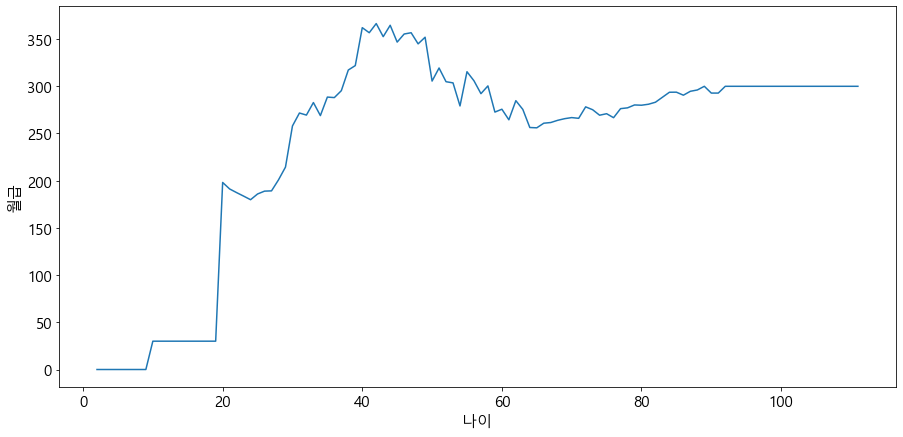

In [ ]:
sns.lineplot(x='나이',y='월급',data=result_df)
plt.show()

In [ ]:
# 결측치 제거하고 시각화
df2 = df1[['h12_g4','p1202_8aq1']]
df2.columns = ['태어난년도','월급']
df2['나이'] = 2017 - df2['태어난년도'] + 1 
df2.dropna(inplace=True)
df2.drop('태어난년도',axis=1,inplace=True)
df2

<ipython-input-176-4c42c8d4ea7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['나이'] = 2017 - df2['태어난년도'] + 1
<ipython-input-176-4c42c8d4ea7e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\medici\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,월급,나이
3,108.9,76
10,20.0,78
16,322.0,40
17,120.0,43
24,300.0,43
...,...,...
15400,230.0,52
15401,138.0,56
15404,286.0,25
15412,179.0,62


In [ ]:
# 나이별 월급 평균
result_df = df2.groupby('나이').mean()
result_df.reset_index(inplace=True)
result_df

,나이,월급
0,20,89.333333
1,21,136.720000
2,22,140.807692
3,23,138.000000
4,24,145.652000
...,...,...
66,86,21.200000
67,87,25.000000
68,88,20.000000
69,90,20.000000


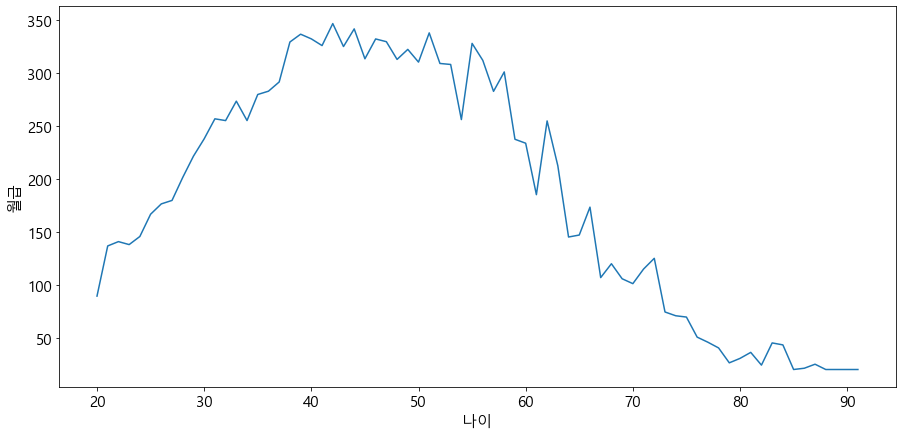

In [ ]:
sns.lineplot(x='나이',y='월급',data=result_df)
plt.show()

# 5.성별과 연령대 분포

In [ ]:
df2 = df1[['h12_g3','h12_g4']]
df2.columns = ['성별','태어난년도']
df2['나이'] = 2017 - df2['태어난년도'] + 1 
df2.dropna(inplace=True)
df2.drop('태어난년도',axis=1,inplace=True)
df2

<ipython-input-199-929f6cdd0116>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['나이'] = 2017 - df2['태어난년도'] + 1
<ipython-input-199-929f6cdd0116>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\medici\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,성별,나이
0,2,82
1,2,73
2,1,70
3,1,76
4,2,95
...,...,...
15417,2,51
15418,2,26
15419,1,23
15420,2,20


In [ ]:
# 성별 변경 
a1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별'] = df2['성별'].map(a1)
df2

<ipython-input-200-55adf5ca98a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].map(a1)


,성별,나이
0,여자,82
1,여자,73
2,남자,70
3,남자,76
4,여자,95
...,...,...
15417,여자,51
15418,여자,26
15419,남자,23
15420,여자,20


In [ ]:
# 연령대를 구한다
df2['연령대'] = df2['나이'] // 10 * 10
df2

<ipython-input-201-2a16a3e1385e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['연령대'] = df2['나이'] // 10 * 10


,성별,나이,연령대
0,여자,82,80
1,여자,73,70
2,남자,70,70
3,남자,76,70
4,여자,95,90
...,...,...,...
15417,여자,51,50
15418,여자,26,20
15419,남자,23,20
15420,여자,20,20


In [ ]:
# 연령대 별 남자, 여자의 수를 구한다.
result_df = df2.groupby(['연령대','성별'],as_index=False).count()
result_df.columns = ['연령대','성별','명']
result_df

,연령대,성별,명
0,0,남자,443
1,0,여자,426
2,10,남자,830
3,10,여자,785
4,20,남자,606
5,20,여자,801
6,30,남자,688
7,30,여자,740
8,40,남자,1068
9,40,여자,1006


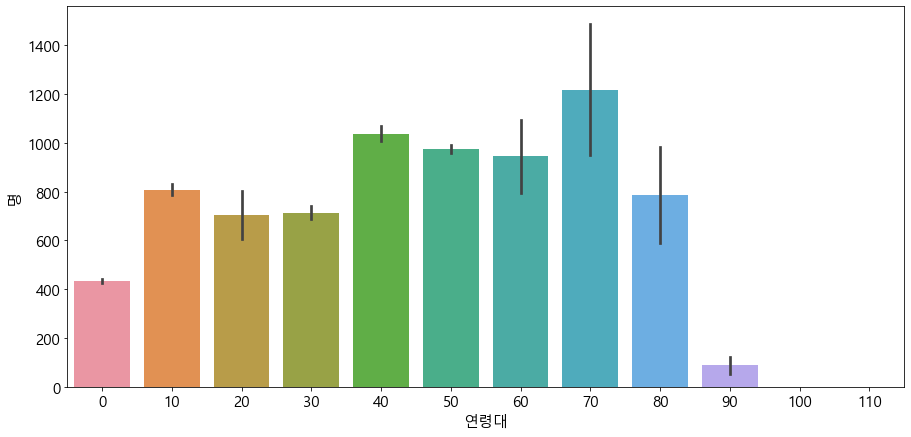

In [ ]:
sns.barplot(x='연령대',y='명', data=result_df)
plt.show()

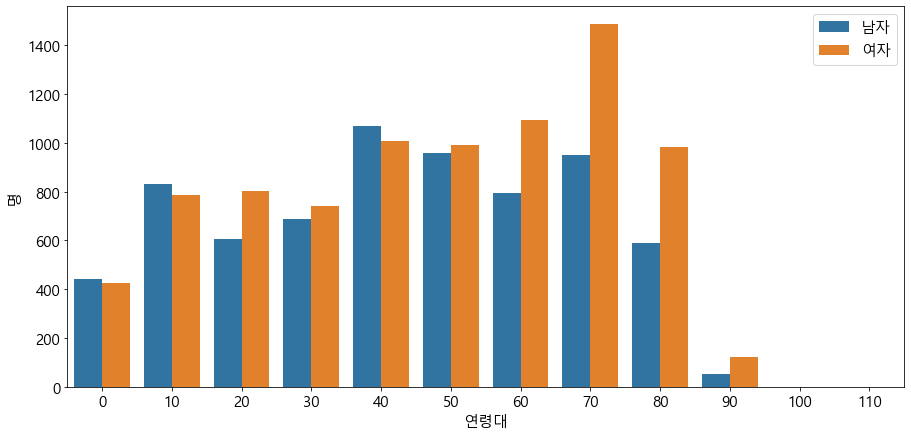

In [ ]:
sns.barplot(x='연령대',y='명', hue='성별',data=result_df)
plt.legend(loc=1)
plt.show()